In [1]:
import pandas as pd
import json
from utils import extract_party_table

with open("../data/party_url.json", "r") as f:
    party_url_map = json.load(f)


In [2]:
import pandas as pd
import requests


# # Read the HTML content from the file
# with open('../data/bjp.html', 'r', encoding='utf-8') as file:
#     html_content = file.read()
final_df = pd.DataFrame()
for party_name in party_url_map:
    # URL of the HTML pa"ge
    party_url = party_url_map[party_name]
    # Send a GET request to the URL
    response = requests.get(party_url)

    # Check if the request was successful
    if response.status_code == 200:
        # Get the HTML content
        html_content = response.text
    else:
        print(f"Failed to retrieve HTML content. Status code: {response.status_code}")

    combined_df = extract_party_table(html_content)
    combined_df["Party Name"] = [party_name] * len(combined_df)
    final_df = pd.concat([final_df, combined_df], ignore_index=True)

In [3]:
final_df["Parliamentary Constituency"].value_counts()

Parliamentary Constituency
VIRUDHUNAGAR(34)    2
Anakapalle(5)       1
Fatehpur(49)        1
Kaushambi(50)       1
Faizabad(54)        1
                   ..
Phulpur(51)         1
Hamirpur(47)        1
Jhansi(46)          1
Akbarpur(44)        1
Ladakh(1)           1
Name: count, Length: 540, dtype: int64

In [4]:
df= final_df.sort_values(by="% Margin", ascending=True)[:50]

In [5]:
df

,S.No,Parliamentary Constituency,Leading Candidate,Total Votes,Margin,% Margin,Party Name
242,4,Kishanganj(10),MOHAMMAD JAWED,143494,30,0.020907,Indian National Congress - INC
184,185,Salempur(71),RAVINDAR KUSHAWAHA,144031,87,0.060404,Bharatiya Janata Party - BJP
8,9,Karimganj(7),KRIPANATH MALLAH,129105,257,0.199063,Bharatiya Janata Party - BJP
159,160,Fatehpur Sikri(19),RAJKUMAR CHAHAR,250399,548,0.218851,Bharatiya Janata Party - BJP
169,170,Farrukhabad(40),MUKESH RAJPUT,285091,810,0.284120,Bharatiya Janata Party - BJP
531,1,VIRUDHUNAGAR(34),VIJAYAPRABHAKARAN V,153492,461,0.300341,Desiya Murpokku Dravida Kazhagam - DMDK
117,118,Satara(45),SHRIMANT CHH UDAYANRAJE PRATAPSINHAMAHARAJ BHO...,324236,1032,0.318287,Bharatiya Janata Party - BJP
398,26,Bishnupur(37),SUJATA MONDAL,423742,1733,0.408975,All India Trinamool Congress - AITC
196,197,Purulia(35),JYOTIRMAY SINGH MAHATO,180117,841,0.466919,Bharatiya Janata Party - BJP
161,162,Aonla(24),DHARMENDRA KASHYAP,334421,1741,0.520601,Bharatiya Janata Party - BJP


In [6]:
final_df[""]

KeyError: ''

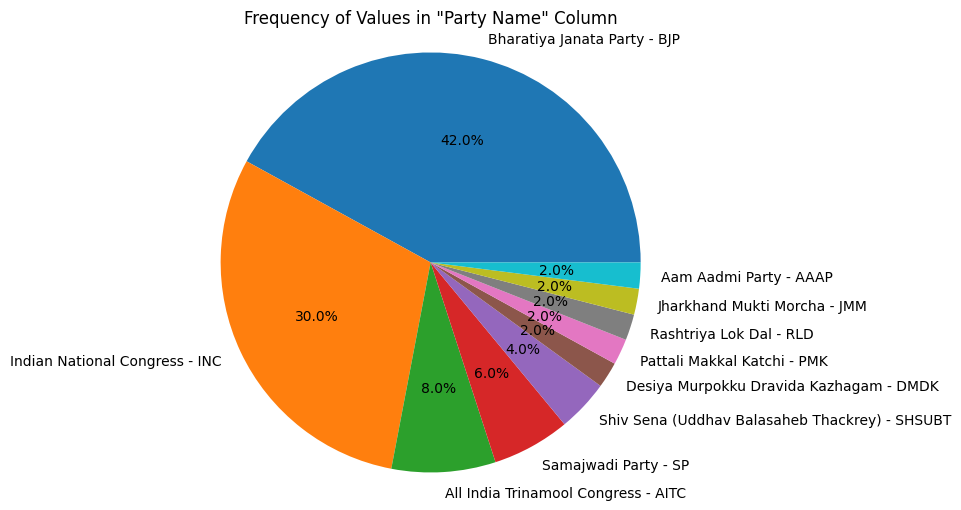

In [ ]:
import matplotlib.pyplot as plt
column_name = "Party Name"

value_counts = df[column_name].value_counts()

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
ax.axis('equal')  # Ensure the pie chart is circular
ax.set_title(f'Frequency of Values in "{column_name}" Column')
plt.show()

In [ ]:
final_df.sort_values(by="Parliamentary Constituency")

,S.No,Parliamentary Constituency,Leading Candidate,Total Votes,Margin,% Margin,Party Name
141,142,AJMER (13),BHAGIRATH CHOUDHARY,741151,327466,44.183439,Bharatiya Janata Party - BJP
140,141,ALWAR(8),BHUPENDER YADAV,566506,49103,8.667693,Bharatiya Janata Party - BJP
246,8,AMBALA(1),VARUN CHAUDHRY,519953,24527,4.717157,Indian National Congress - INC
515,2,ANANTNAG-RAJOURI(3),MIAN ALTAF AHMAD,459199,236730,51.552813,Jammu & Kashmir National Conference - JKN
409,6,ARAKKONAM(7),S JAGATHRATCHAKAN,115625,63955,55.312432,Dravida Munnetra Kazhagam - DMK
...,...,...,...,...,...,...,...
466,1,Wardha(8),AMAR SHARADRAO KALE,167969,26285,15.648721,Nationalist Congress Party – Sharadchandra Paw...
265,27,Wayanad(4),RAHUL GANDHI,585413,324320,55.400205,Indian National Congress - INC
235,236,West Delhi(6),KAMALJEET SEHRAWAT,448855,102509,22.837888,Bharatiya Janata Party - BJP
455,1,Yavatmal- Washim(14),SANJAY UTTAMRAO DESHMUKH,336583,55810,16.581348,Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT


In [ ]:
constituency = "SONIPAT(6)"
final_df[final_df["Parliamentary Constituency"] == "KURUKSHETRA(2)"]

,S.No,Parliamentary Constituency,Leading Candidate,Total Votes,Margin,% Margin,Party Name
52,53,KURUKSHETRA(2),NAVEEN JINDAL,268221,6069,2.262686,Bharatiya Janata Party - BJP
